In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt

sns.set()

In [3]:
#import data as csv
Raw_data=pd.read_csv(r'D:\\OnlineRetail.csv')
Raw_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [4]:
#checking for any missing values
Raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
Raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#cleaning data by dropping the missimg values on the customer Id subset
clean_data=Raw_data.dropna(subset=['CustomerID'])
clean_data=clean_data.drop_duplicates()
clean_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [8]:
#Replace negative values in the quantity column with 0
clean_data.Quantity=np.where(clean_data.Quantity<0,0,clean_data.Quantity)
clean_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.863134,3.474064,15281.160818
std,179.581848,69.764035,1714.006089
min,0.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
clean_data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# cohort Analysis

In [10]:
#Define a function to return month in a specific format
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [11]:
#creating a new date month column
#convert the date time object to datetime format
clean_data['InvoiceDate']=pd.to_datetime(clean_data['InvoiceDate'])
clean_data['Invoicemonth']=clean_data['InvoiceDate'].apply(get_month)
clean_data['Invoicemonth'].head()


0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: Invoicemonth, dtype: datetime64[ns]

In [12]:
#create a cohort month by grouping customers by their customer ID
#use the groupby function
clean_data['cohortmonth']=clean_data.groupby('CustomerID')['Invoicemonth'].transform('min')
clean_data.inplace=True
clean_data[200000:400000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoicemonth,cohortmonth
283055,561688,22042,CHRISTMAS CARD SINGING ANGEL,24,2011-07-29 08:48:00,0.42,14407.0,United Kingdom,2011-07-01,2011-05-01
283056,561688,22946,WOODEN ADVENT CALENDAR CREAM,3,2011-07-29 08:48:00,16.95,14407.0,United Kingdom,2011-07-01,2011-05-01
283057,561688,22846,BREAD BIN DINER STYLE RED,4,2011-07-29 08:48:00,14.95,14407.0,United Kingdom,2011-07-01,2011-05-01
283058,561689,22420,LIPSTICK PEN BABY PINK,24,2011-07-29 09:01:00,0.42,15942.0,United Kingdom,2011-07-01,2011-07-01
283059,561689,22419,LIPSTICK PEN RED,24,2011-07-29 09:01:00,0.42,15942.0,United Kingdom,2011-07-01,2011-07-01
...,...,...,...,...,...,...,...,...,...,...
538624,581412,21479,WHITE SKULL HOT WATER BOTTLE,1,2011-08-12 14:38:00,4.25,14415.0,United Kingdom,2011-08-01,2010-12-01
538625,581412,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,3,2011-08-12 14:38:00,0.79,14415.0,United Kingdom,2011-08-01,2010-12-01
538627,581412,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2011-08-12 14:38:00,4.95,14415.0,United Kingdom,2011-08-01,2010-12-01
538628,581412,22835,HOT WATER BOTTLE I AM SO POORLY,1,2011-08-12 14:38:00,4.95,14415.0,United Kingdom,2011-08-01,2010-12-01


# Creating the cohort


In [13]:
#define a function that splits date into year, month and day
def get_month(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month,day

In [14]:
#split invoincemonth in to individual variables
invoice_year, invoice_month,_=get_month(clean_data,'Invoicemonth')

In [15]:
#inspect the variables
invoice_year[200000:400000] #display first 15 variables


283055    2011
283056    2011
283057    2011
283058    2011
283059    2011
          ... 
538624    2011
538625    2011
538627    2011
538628    2011
538629    2011
Name: Invoicemonth, Length: 200000, dtype: int64

In [16]:
invoice_month[60000:80000]

94267     2
94268     2
94269     2
94270     2
94271     2
         ..
120557    3
120558    3
120559    3
120560    3
120561    3
Name: Invoicemonth, Length: 20000, dtype: int64

In [17]:
#applying the same to cohort date
#splitting
cohort_year,cohort_month,_=get_month(clean_data,'cohortmonth')

In [18]:
cohort_year[200000:400000]


283055    2011
283056    2011
283057    2011
283058    2011
283059    2011
          ... 
538624    2010
538625    2010
538627    2010
538628    2010
538629    2010
Name: cohortmonth, Length: 200000, dtype: int64

In [19]:
cohort_month[60000:80000]

94267     2
94268     2
94269     2
94270     2
94271     2
         ..
120557    2
120558    2
120559    2
120560    2
120561    2
Name: cohortmonth, Length: 20000, dtype: int64

In [20]:
#creating a variable that finds the difference invoice and cohort year
year_difference=invoice_year-cohort_year
#inspecting the variable
year_difference[200000:400000]

283055    0
283056    0
283057    0
283058    0
283059    0
         ..
538624    1
538625    1
538627    1
538628    1
538629    1
Length: 200000, dtype: int64

In [21]:
#creating a variable that finds the difference between the invoice month and cohort month followed by variable inspection
month_difference=invoice_month-cohort_month
month_difference[200000:400000]

283055    2
283056    2
283057    2
283058    0
283059    0
         ..
538624   -4
538625   -4
538627   -4
538628   -4
538629   -4
Length: 200000, dtype: int64

In [22]:
#creating a cohort index column
clean_data['cohort index']=(year_difference*12 + month_difference)
clean_data['cohort index'][200000:400000]

283055    2
283056    2
283057    2
283058    0
283059    0
         ..
538624    8
538625    8
538627    8
538628    8
538629    8
Name: cohort index, Length: 200000, dtype: int64

In [23]:
clean_data[200000:400000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoicemonth,cohortmonth,cohort index
283055,561688,22042,CHRISTMAS CARD SINGING ANGEL,24,2011-07-29 08:48:00,0.42,14407.0,United Kingdom,2011-07-01,2011-05-01,2
283056,561688,22946,WOODEN ADVENT CALENDAR CREAM,3,2011-07-29 08:48:00,16.95,14407.0,United Kingdom,2011-07-01,2011-05-01,2
283057,561688,22846,BREAD BIN DINER STYLE RED,4,2011-07-29 08:48:00,14.95,14407.0,United Kingdom,2011-07-01,2011-05-01,2
283058,561689,22420,LIPSTICK PEN BABY PINK,24,2011-07-29 09:01:00,0.42,15942.0,United Kingdom,2011-07-01,2011-07-01,0
283059,561689,22419,LIPSTICK PEN RED,24,2011-07-29 09:01:00,0.42,15942.0,United Kingdom,2011-07-01,2011-07-01,0
...,...,...,...,...,...,...,...,...,...,...,...
538624,581412,21479,WHITE SKULL HOT WATER BOTTLE,1,2011-08-12 14:38:00,4.25,14415.0,United Kingdom,2011-08-01,2010-12-01,8
538625,581412,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,3,2011-08-12 14:38:00,0.79,14415.0,United Kingdom,2011-08-01,2010-12-01,8
538627,581412,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2011-08-12 14:38:00,4.95,14415.0,United Kingdom,2011-08-01,2010-12-01,8
538628,581412,22835,HOT WATER BOTTLE I AM SO POORLY,1,2011-08-12 14:38:00,4.95,14415.0,United Kingdom,2011-08-01,2010-12-01,8


# Cohort Analysis 1

In [24]:
#Group data by cohort_month cohort index then aggregate by column customer ID
cohort_data=clean_data.groupby(['cohortmonth','cohort index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
#exploring the variable
cohort_data[60:80]


,cohortmonth,cohort index,CustomerID
60,2010-03-01,21,9
61,2010-05-01,0,68
62,2010-05-01,1,3
63,2010-05-01,2,3
64,2010-05-01,3,2
65,2010-05-01,4,3
66,2010-05-01,5,1
67,2010-05-01,7,24
68,2010-05-01,8,32
69,2010-05-01,9,20


In [25]:
#plumb the cohort data into a pivot table. Also set the indeces
cohort_count=cohort_data.pivot_table(index='cohortmonth', columns='cohort index', values='CustomerID')
cohort_count.head(10)
                                        


cohort index,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohortmonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,98.0,9.0,4.0,NaN,7.0,7.0,4.0,10.0,10.0,5.0,...,38.0,40.0,36.0,44.0,41.0,37.0,41.0,44.0,40.0,23.0
2010-02-01,108.0,2.0,NaN,NaN,3.0,7.0,5.0,12.0,5.0,NaN,...,39.0,38.0,43.0,48.0,34.0,41.0,45.0,53.0,19.0,NaN
2010-03-01,49.0,NaN,1.0,1.0,1.0,2.0,5.0,NaN,NaN,14.0,...,23.0,16.0,19.0,19.0,13.0,24.0,23.0,9.0,NaN,NaN
2010-05-01,68.0,3.0,3.0,2.0,3.0,1.0,NaN,24.0,32.0,20.0,...,30.0,32.0,31.0,33.0,40.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,76.0,2.0,4.0,4.0,1.0,NaN,26.0,29.0,25.0,25.0,...,27.0,33.0,26.0,39.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.0,2.0,2.0,1.0,NaN,9.0,24.0,22.0,22.0,19.0,...,22.0,20.0,29.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,87.0,3.0,2.0,NaN,30.0,37.0,30.0,34.0,33.0,36.0,...,41.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,83.0,1.0,NaN,23.0,29.0,20.0,30.0,23.0,29.0,26.0,...,32.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,38.0,NaN,11.0,15.0,12.0,15.0,18.0,8.0,14.0,11.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creating retention as a percentage

In [26]:
#Total customers per cohort is equal to the first index
#declaring a variable cohort_size
cohort_size=cohort_count.iloc[:,0]


In [27]:
#Declaring a variable retention that divides all values in the table by chort size
retention=cohort_count.divide(cohort_size,axis=0)
#exploring the variable
retention.head()

cohort index,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohortmonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.0,0.091837,0.040816,NaN,0.071429,0.071429,0.040816,0.102041,0.102041,0.051020,...,0.387755,0.408163,0.367347,0.448980,0.418367,0.377551,0.418367,0.448980,0.408163,0.234694
2010-02-01,1.0,0.018519,NaN,NaN,0.027778,0.064815,0.046296,0.111111,0.046296,NaN,...,0.361111,0.351852,0.398148,0.444444,0.314815,0.379630,0.416667,0.490741,0.175926,NaN
2010-03-01,1.0,NaN,0.020408,0.020408,0.020408,0.040816,0.102041,NaN,NaN,0.285714,...,0.469388,0.326531,0.387755,0.387755,0.265306,0.489796,0.469388,0.183673,NaN,NaN
2010-05-01,1.0,0.044118,0.044118,0.029412,0.044118,0.014706,NaN,0.352941,0.470588,0.294118,...,0.441176,0.470588,0.455882,0.485294,0.588235,0.294118,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.026316,0.052632,0.052632,0.013158,NaN,0.342105,0.381579,0.328947,0.328947,...,0.355263,0.434211,0.342105,0.513158,0.065789,NaN,NaN,NaN,NaN,NaN


In [28]:
#converting the retention into percentages. Round off the values to 3
retention.round(3)*100

cohort index,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohortmonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,100.0,9.2,4.1,NaN,7.1,7.1,4.1,10.2,10.2,5.1,...,38.8,40.8,36.7,44.9,41.8,37.8,41.8,44.9,40.8,23.5
2010-02-01,100.0,1.9,NaN,NaN,2.8,6.5,4.6,11.1,4.6,NaN,...,36.1,35.2,39.8,44.4,31.5,38.0,41.7,49.1,17.6,NaN
2010-03-01,100.0,NaN,2.0,2.0,2.0,4.1,10.2,NaN,NaN,28.6,...,46.9,32.7,38.8,38.8,26.5,49.0,46.9,18.4,NaN,NaN
2010-05-01,100.0,4.4,4.4,2.9,4.4,1.5,NaN,35.3,47.1,29.4,...,44.1,47.1,45.6,48.5,58.8,29.4,NaN,NaN,NaN,NaN
2010-06-01,100.0,2.6,5.3,5.3,1.3,NaN,34.2,38.2,32.9,32.9,...,35.5,43.4,34.2,51.3,6.6,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,3.8,3.8,1.9,NaN,17.0,45.3,41.5,41.5,35.8,...,41.5,37.7,54.7,11.3,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,3.4,2.3,NaN,34.5,42.5,34.5,39.1,37.9,41.4,...,47.1,56.3,25.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,100.0,1.2,NaN,27.7,34.9,24.1,36.1,27.7,34.9,31.3,...,38.6,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,100.0,NaN,28.9,39.5,31.6,39.5,47.4,21.1,36.8,28.9,...,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


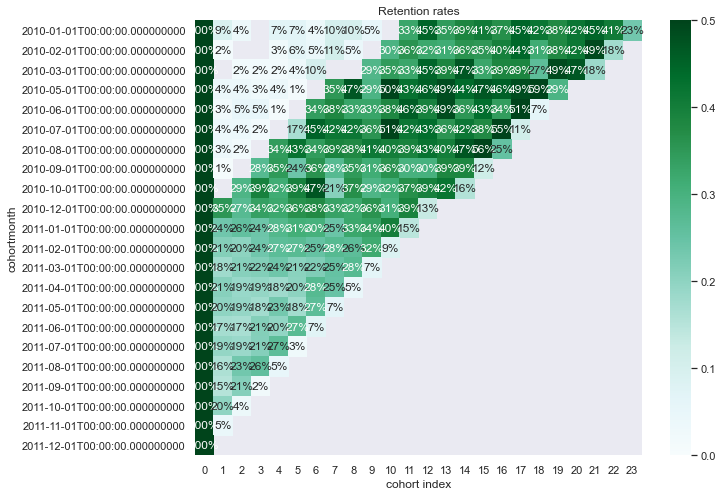

In [29]:
#Drawing a heatmap 
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

# RFM SEGEMENTATION

In [30]:
#creating a column called total sum that gives the total monetary value of each transaction
clean_data['total sum']=clean_data['UnitPrice']*clean_data['Quantity']
clean_data.inplace=True
clean_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoicemonth,cohortmonth,cohort index,total sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01,0,20.34


In [31]:
#Getting a desccription of ours data
clean_data.describe()

,Quantity,UnitPrice,CustomerID,cohort index,total sum
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.863134,3.474064,15281.160818,6.523725,22.129284
std,179.581848,69.764035,1714.006089,6.144190,307.646110
min,0.000000,0.000000,12346.000000,0.000000,0.000000
25%,2.000000,1.250000,13939.000000,0.000000,4.250000
50%,5.000000,1.950000,15145.000000,5.000000,11.700000
75%,12.000000,3.750000,16784.000000,10.000000,19.800000
max,80995.000000,38970.000000,18287.000000,23.000000,168469.600000


In [32]:
#Snapshot date. One day after the final invoice date
snapshot_date=dt.datetime(2011,12,2)
snapshot_date

datetime.datetime(2011, 12, 2, 0, 0)

In [33]:
#confining the data to one year to limit the recency value to one 365. Aggregate data on a customer level and calculate the RFM metrics for each customer
clean_data_rfm = clean_data.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,'InvoiceNo': 'count','total sum': 'sum'})

In [34]:
#Exploring the newly created variable
clean_data_rfm.head(10)

,CustomerID,InvoiceDate,InvoiceNo,total sum
0,12346.0,317,2,77183.60
1,12347.0,31,182,4310.00
2,12348.0,67,31,1797.24
3,12349.0,10,73,1757.55
4,12350.0,302,17,334.40
5,12352.0,64,95,2506.04
6,12353.0,196,4,89.00
7,12354.0,224,58,1079.40
8,12355.0,87,13,459.40
9,12356.0,14,59,2811.43


In [35]:
clean_data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4372 non-null   float64
 1   InvoiceDate  4372 non-null   int64  
 2   InvoiceNo    4372 non-null   int64  
 3   total sum    4372 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 170.8 KB


In [36]:
#convert invoice date to an int datatype
clean_data_rfm['InvoiceDate']=clean_data_rfm['InvoiceDate'].astype(int)
#explore invoice date
clean_data_rfm['InvoiceDate'].head()

0    317
1     31
2     67
3     10
4    302
Name: InvoiceDate, dtype: int32

In [37]:
#renaming columns to recency, frequency and monetary

clean_data_rfm=clean_data_rfm.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','total sum': 'MonetaryValue'})
clean_data_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,317,2,77183.60
1,12347.0,31,182,4310.00
2,12348.0,67,31,1797.24
3,12349.0,10,73,1757.55
4,12350.0,302,17,334.40


In [38]:
#Get the descriptive statistics of recency
clean_data_rfm.Recency.describe()

count    4372.000000
mean       91.987420
std       113.931649
min        -9.000000
25%        11.000000
50%        48.000000
75%       143.000000
max       688.000000
Name: Recency, dtype: float64

In [39]:
#Replace all non negative vakues with 0
clean_data_rfm.Recency=np.where(clean_data_rfm.Recency<0,0,clean_data_rfm.Recency)
clean_data_rfm.Recency.describe()

count    4372.000000
mean       92.543687
std       113.463028
min         0.000000
25%        11.000000
50%        48.000000
75%       143.000000
max       688.000000
Name: Recency, dtype: float64

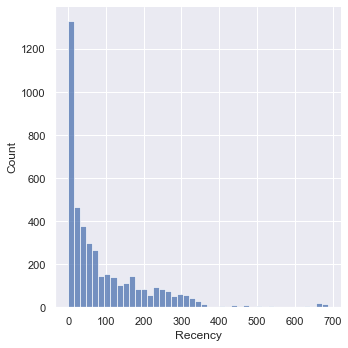

In [40]:
#plot recency distribution
x=clean_data_rfm['Recency']
ax=sns.displot(x)

In [41]:
#Descriptive statistics for frequency
clean_data_rfm.Frequency.describe()

count    4372.000000
mean       91.858188
std       229.223566
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7812.000000
Name: Frequency, dtype: float64

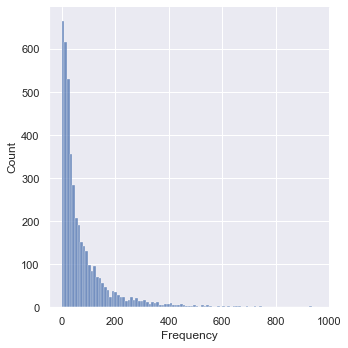

In [42]:
#frequency frequency distribution taking frequencies less than 1000
x=clean_data_rfm.query('Frequency<1000')['Frequency']
ax=sns.displot(x)

In [43]:
#create quantiles on the data
quantiles=clean_data_rfm.quantile(q=[0.25,0.50,0.75])
#save in a dict using the to_dict function
quantiles=quantiles.to_dict()
#Explore the quantiles 
quantiles

{'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25},
 'Recency': {0.25: 11.0, 0.5: 48.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'MonetaryValue': {0.25: 302.17499999999995,
  0.5: 659.435,
  0.75: 1647.3150000000003}}

In [44]:
#create functions to return R, F, M
def Rscoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FMscoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [45]:
#calculate and add r,f,m score columns to the existing dataset
clean_data_rfm['R']=clean_data_rfm['Recency'].apply(Rscoring,args=('Recency',quantiles))
clean_data_rfm['F']=clean_data_rfm['Frequency'].apply(FMscoring,args=('Frequency',quantiles))
clean_data_rfm['M']=clean_data_rfm['MonetaryValue'].apply(FMscoring,args=('MonetaryValue',quantiles))
clean_data_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,317,2,77183.60,4,4,1
1,12347.0,31,182,4310.00,2,1,1
2,12348.0,67,31,1797.24,3,3,1
3,12349.0,10,73,1757.55,1,2,1
4,12350.0,302,17,334.40,4,4,3


In [46]:
#create RFM score column and calculating RFM Group (concatenated)
clean_data_rfm['RFM Group']=clean_data_rfm.R.map(str)+clean_data_rfm.F.map(str)+clean_data_rfm.M.map(str)
clean_data_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group
0,12346.0,317,2,77183.60,4,4,1,441
1,12347.0,31,182,4310.00,2,1,1,211
2,12348.0,67,31,1797.24,3,3,1,331
3,12349.0,10,73,1757.55,1,2,1,121
4,12350.0,302,17,334.40,4,4,3,443


In [47]:
#Adding an RFM SCORE column
clean_data_rfm['RFMScore']=clean_data_rfm[['R','F','M']].sum(axis=1)
clean_data_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group,RFMScore
0,12346.0,317,2,77183.60,4,4,1,441,9
1,12347.0,31,182,4310.00,2,1,1,211,4
2,12348.0,67,31,1797.24,3,3,1,331,7
3,12349.0,10,73,1757.55,1,2,1,121,4
4,12350.0,302,17,334.40,4,4,3,443,11


In [48]:
#Assigning a loyalty level to each customer. 4 groups
#If last line of the code doesn't work, reset the index using reset_index()
Loyalty_level=['Platinum','Gold','Silver','Bronze']
Score_cuts=pd.qcut(clean_data_rfm.RFMScore,q=4,labels=Loyalty_level)
clean_data_rfm['RFM loyalty level']=Score_cuts.values
clean_data_rfm.head()


,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group,RFMScore,RFM loyalty level
0,12346.0,317,2,77183.60,4,4,1,441,9,Silver
1,12347.0,31,182,4310.00,2,1,1,211,4,Platinum
2,12348.0,67,31,1797.24,3,3,1,331,7,Gold
3,12349.0,10,73,1757.55,1,2,1,121,4,Platinum
4,12350.0,302,17,334.40,4,4,3,443,11,Bronze


In [49]:
#code if you wish to validate your results. Check whether customers with a loyalty level of 121 are platinum
clean_data_rfm[clean_data_rfm['RFM Group']=='121'].sort_values('MonetaryValue',ascending=False).head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group,RFMScore,RFM loyalty level
4125,17949.0,0,79,58510.48,1,2,1,121,4,Platinum
4053,17857.0,9,56,26879.04,1,2,1,121,4,Platinum
198,12590.0,0,70,9864.26,1,2,1,121,4,Platinum
4225,18092.0,0,90,9068.26,1,2,1,121,4,Platinum
3649,17306.0,2,69,8631.31,1,2,1,121,4,Platinum
3182,16656.0,0,80,8625.80,1,2,1,121,4,Platinum
745,13324.0,0,77,7121.95,1,2,1,121,4,Platinum
498,12989.0,0,68,6924.11,1,2,1,121,4,Platinum
2961,16353.0,0,94,6675.71,1,2,1,121,4,Platinum
2657,15939.0,0,77,6115.01,1,2,1,121,4,Platinum


# Preprocessing data for k-means analysis

In [114]:
#Creating a variable data to contain clean_data_rfm
data=clean_data_rfm

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

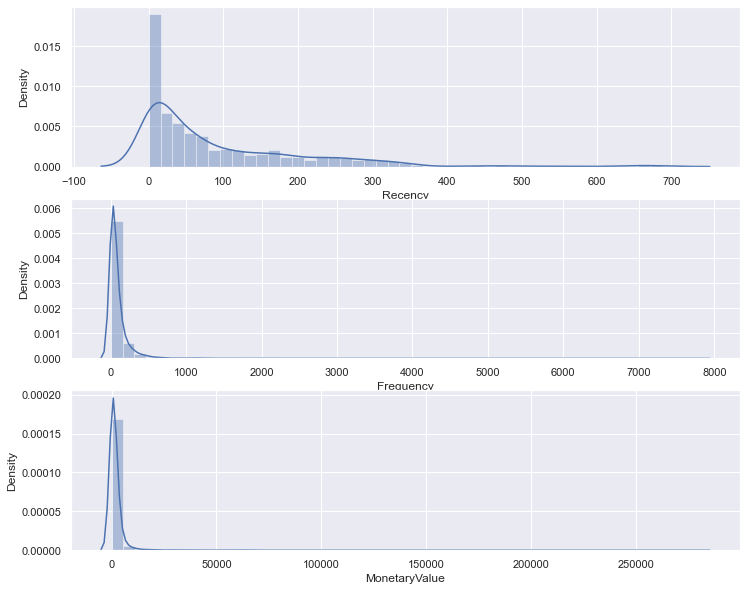

In [115]:
  #plotting data to check its distribution
#plot recency, frequency and monetary histograms
plt.figure(figsize=(12,10))
#subplot 1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
#subplot 2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])
#subplot 3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

In [116]:
#data is skewed to the right. Apply log transformation to remove skewness but first check for negative values and drop them
#Exploring the statistical distribution of data use describe ,method
data.describe()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.543687,91.858188,2032.755923,2.490851,2.505489,2.500000,7.496340
std,1722.390705,113.463028,229.223566,8952.025481,1.123024,1.122233,1.118162,2.808578
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,13812.750000,11.000000,17.000000,302.175000,1.000000,1.750000,1.750000,5.000000
50%,15300.500000,48.000000,41.000000,659.435000,2.000000,3.000000,2.500000,8.000000
75%,16778.250000,143.000000,99.250000,1647.315000,3.000000,4.000000,3.250000,10.000000
max,18287.000000,688.000000,7812.000000,280206.020000,4.000000,4.000000,4.000000,12.000000


In [117]:
#drop all zero values
data.loc[(data!=0).any(axis=1)]
data.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group,RFMScore,RFM loyalty level
0,12346.0,317,2,77183.60,4,4,1,441,9,Silver
1,12347.0,31,182,4310.00,2,1,1,211,4,Platinum
2,12348.0,67,31,1797.24,3,3,1,331,7,Gold
3,12349.0,10,73,1757.55,1,2,1,121,4,Platinum
4,12350.0,302,17,334.40,4,4,3,443,11,Bronze
5,12352.0,64,95,2506.04,3,2,1,321,6,Gold
6,12353.0,196,4,89.00,4,4,4,444,12,Bronze
7,12354.0,224,58,1079.40,4,2,2,422,8,Gold
8,12355.0,87,13,459.40,3,4,3,343,10,Silver
9,12356.0,14,59,2811.43,2,2,1,221,5,Platinum


In [118]:
#Exploring the new variable
data.describe()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.543687,91.858188,2032.755923,2.490851,2.505489,2.500000,7.496340
std,1722.390705,113.463028,229.223566,8952.025481,1.123024,1.122233,1.118162,2.808578
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,13812.750000,11.000000,17.000000,302.175000,1.000000,1.750000,1.750000,5.000000
50%,15300.500000,48.000000,41.000000,659.435000,2.000000,3.000000,2.500000,8.000000
75%,16778.250000,143.000000,99.250000,1647.315000,3.000000,4.000000,3.250000,10.000000
max,18287.000000,688.000000,7812.000000,280206.020000,4.000000,4.000000,4.000000,12.000000


In [119]:
#Drop customers whose monetary value, recency and frequency is zero
data = data[data.MonetaryValue>0]
data = data[data.Recency>0]
data = data[data.Frequency>0]
data.describe()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,15302.781074,100.714322,76.896675,1583.085277,2.645013,2.572123,2.580563,7.797698
std,1714.583144,112.273378,139.586394,6520.676756,1.062065,1.106408,1.100492,2.688433
min,12346.000000,1.000000,1.000000,3.750000,1.000000,1.000000,1.000000,3.000000
25%,13823.750000,17.000000,16.000000,288.925000,2.000000,2.000000,2.000000,6.000000
50%,15310.000000,59.000000,37.000000,604.850000,3.000000,3.000000,3.000000,8.000000
75%,16774.750000,155.000000,90.000000,1426.037500,4.000000,4.000000,4.000000,10.000000
max,18283.000000,688.000000,5128.000000,259657.300000,4.000000,4.000000,4.000000,12.000000


In [120]:
#Removing skewness by applying log transformation 
data['Recency']=np.log(data['Recency'])
data['Frequency']=np.log(data['Frequency'])
data['MonetaryValue']=np.log(data['MonetaryValue'])


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

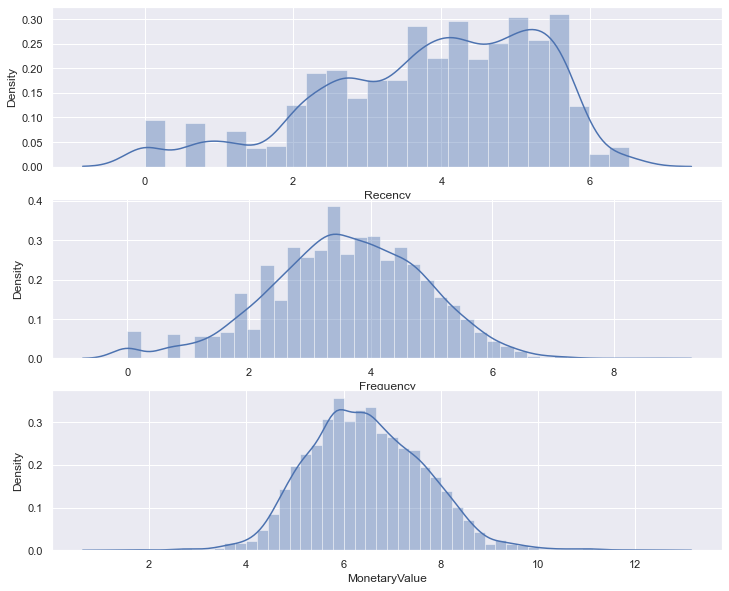

In [121]:
#plotting the transformed data
plt.figure(figsize=(12,10))
#subplot 1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
#subplot 2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])
#subplot 3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])


In [122]:
#standardizing data using the scaler method
Scaler=StandardScaler()
scaled_data=Scaler.fit_transform(data[['Recency','Frequency','MonetaryValue']])

In [124]:
#Checking for the shape of scaled data
scaled_data.shape

(3910, 3)

In [125]:
#create a dataframe with scaled values
Scaled_values=pd.DataFrame(scaled_data)
Scaled_values.columns=['Recency','Frequency','MonetaryValue']
Scaled_values.head()

,Recency,Frequency,MonetaryValue
0,1.308766,-2.277934,3.997002
1,-0.282623,1.259464,1.588966
2,0.244920,-0.128578,0.858951
3,-1.057060,0.543064,0.840314
4,1.275585,-0.599703,-0.544574


In [126]:
#use the elbow method to determine optimum number of clusters
from sklearn.cluster import KMeans

In [134]:
WCSS=[]
for i in range (1,10):
    
    #initialize kmeans with k clusters
    kmeans = KMeans(n_clusters=i, random_state=1)
    #fit kmeans on the normalized dataset
    kmeans.fit(Scaled_values)
    WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

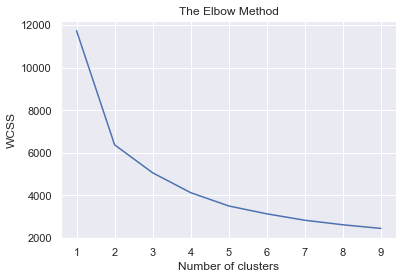

In [138]:
#plotting the elbow
plt.plot(range(1,10),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters'); 
plt.ylabel('WCSS')


In [144]:
#Explore clustering solutions and select the number of clusters
kmeans_new=KMeans(4)
kmeans_new.fit(Scaled_values)
clusters_new=data.copy()
clusters_new['cluster_pred']=kmeans_new.fit_predict(Scaled_values)
clusters_new.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM Group,RFMScore,RFM loyalty level,cluster_pred
0,12346.0,5.758902,0.693147,11.253942,4,4,1,441,9,Silver,3
1,12347.0,3.433987,5.204007,8.368693,2,1,1,211,4,Platinum,1
2,12348.0,4.204693,3.433987,7.494007,3,3,1,331,7,Gold,3
3,12349.0,2.302585,4.290459,7.471676,1,2,1,121,4,Platinum,1
4,12350.0,5.710427,2.833213,5.812338,4,4,3,443,11,Bronze,0
5,12352.0,4.158883,4.553877,7.826459,3,2,1,321,6,Gold,3
6,12353.0,5.278115,1.386294,4.488636,4,4,4,444,12,Bronze,0
7,12354.0,5.411646,4.060443,6.984161,4,2,2,422,8,Gold,3
8,12355.0,4.465908,2.564949,6.129921,3,4,3,343,10,Silver,0
9,12356.0,2.639057,4.077537,7.941449,2,2,1,221,5,Platinum,1


In [153]:
#plotting data (snake plot)
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(data.reset_index(),
                    id_vars=['CustomerID','cluster_pred'],
                    value_vars=['Recency', 'Frequency','MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')
# Building the snakeplot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value",hue='cluster_pred', data=data_melt)

KeyError: "The following 'id_vars' are not present in the DataFrame: ['cluster_pred']"